In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
df_cat_group = df.groupby(by='Category').sum()
df_cat_group

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


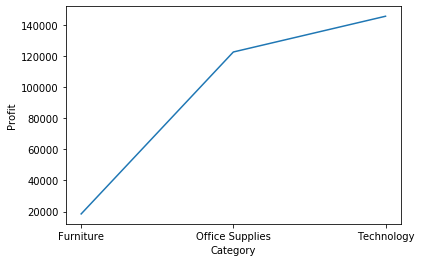

In [37]:
sb.lineplot(x=df_cat_group.index, y=df_cat_group['Profit'])

In [44]:
df[df['Category']=='Furniture']['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

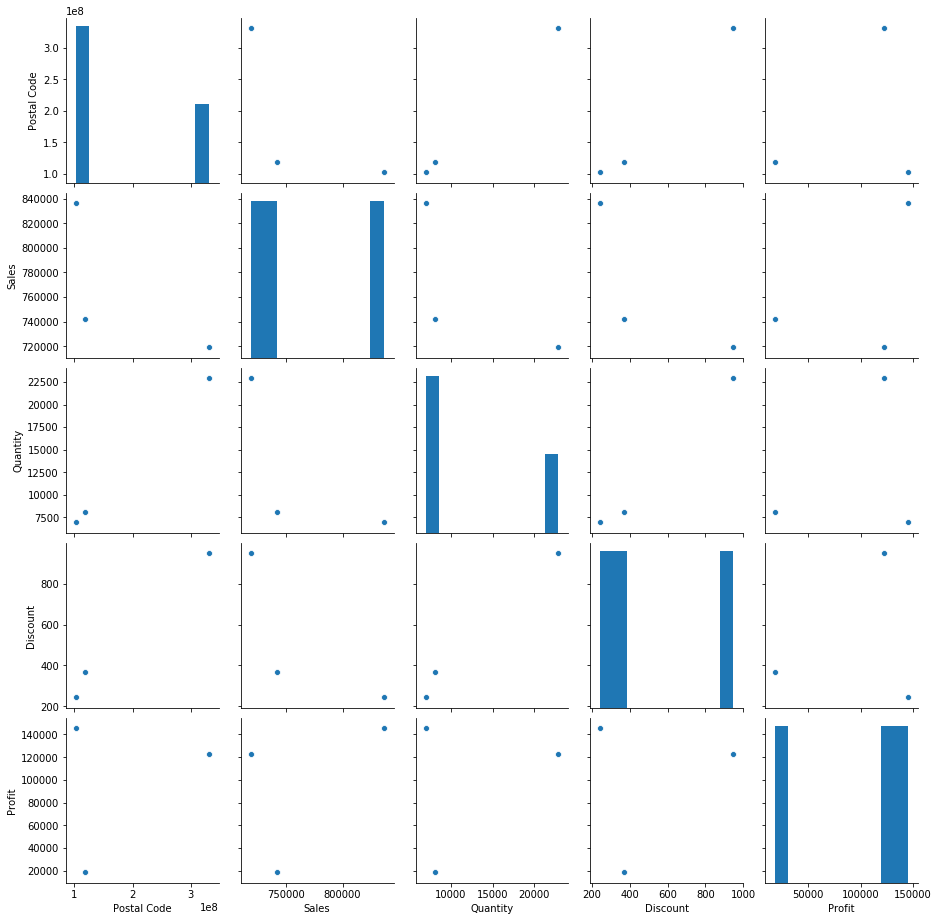

In [45]:
sb.pairplot(df_cat_group)

In [51]:
df_n_pro = df[df['Profit'] < 0]

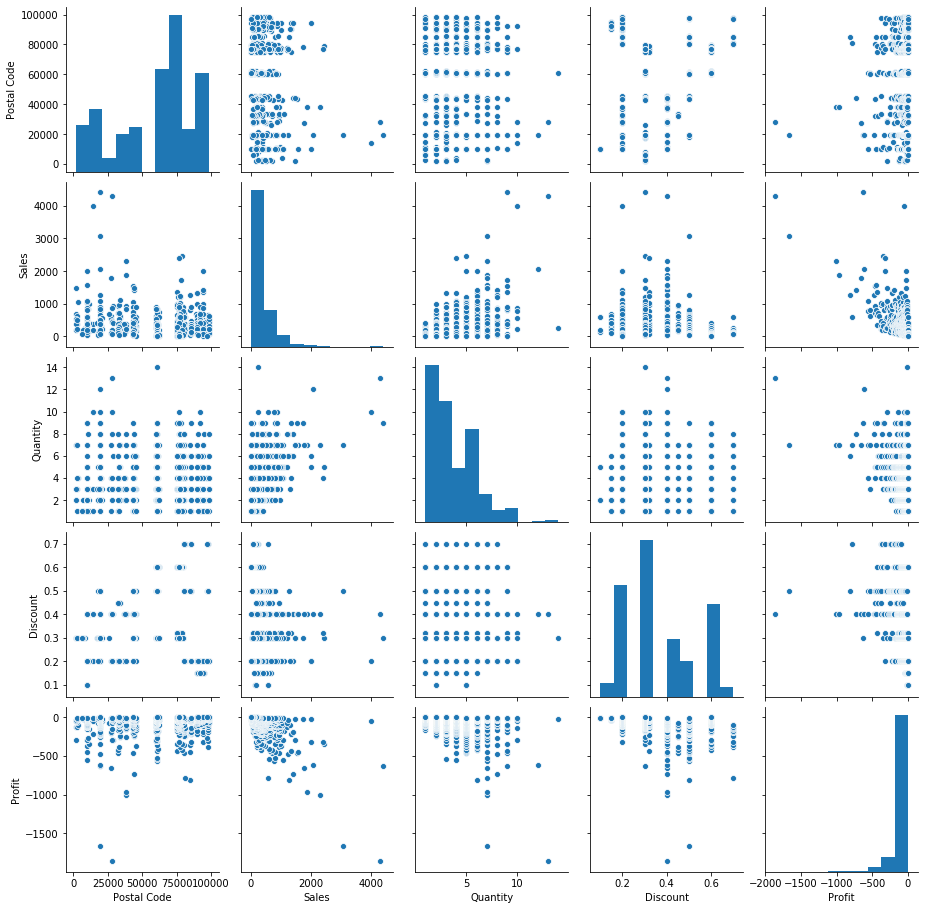

In [84]:
df_fur = df_n_pro[df_n_pro['Category']=='Furniture']
sb.pairplot(df_fur.sort_values(by='Profit'))

In [68]:
data = df_fur.groupby(by='Sub-Category').sum()
data

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Tables,10224004,104978.5460,757,74.15,-32412.1483


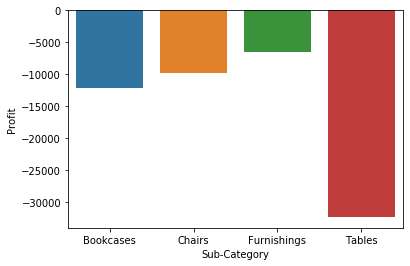

In [69]:
sb.barplot(x=data.index, y=data['Profit'])

In [83]:
# maximum loss was faced by tables in furniture category

In [81]:
df[df['Sub-Category'] == 'Tables'][['Sales','Quantity', 'Discount', 'Profit']].sum()

Sales       206965.5320
Quantity      1241.0000
Discount        83.3500
Profit      -17725.4811
dtype: float64

In [82]:
# this shows that discount was still applied even when company was facing loss.

In [94]:
df_fur.groupby(by=['Region','Postal Code']).describe()

Sales                                                     \
                    count        mean         std      min      25%      50%   
Region  Postal Code                                                            
Central 60016         3.0  241.586667  212.341045    8.544  150.322  292.100   
        60035         3.0  612.677333  271.704307  384.944  462.301  539.658   
        60068         1.0  254.744000         NaN  254.744  254.744  254.744   
        60076         3.0  118.544000  128.537983   32.952   44.640   56.328   
        60089         1.0  355.455000         NaN  355.455  355.455  355.455   
...                   ...         ...         ...      ...      ...      ...   
West    97756         1.0  177.225000         NaN  177.225  177.225  177.225   
        98103         6.0  251.297333  125.478243   61.584  201.582  253.556   
        98105         2.0  491.136000   58.786029  449.568  470.352  491.136   
        98115         3.0  298.864000  276.607876   97.568  141.160  184.752   
        98198         1.0  215.976000         NaN  215.976  215.976  215.976   

                                      Quantity            ... Discount       \
                         75%      max    count      mean  ...      75%  max   
Region  Postal Code                                       ...                 
Central 60016        358.108  424.116      3.0  4.000000  ...     0.55  0.6   
        60035        726.544  913.430      3.0  4.000000  ...     0.30  0.3   
        60068        254.744  254.744      1.0  7.000000  ...     0.60  0.6   
        60076        161.340  266.352      3.0  5.000000  ...     0.60  0.6   
        60089        355.455  355.455      1.0  3.000000  ...     0.50  0.5   
...                      ...      ...      ...       ...  ...      ...  ...   
West    97756        177.225  177.225      1.0  5.000000  ...     0.50  0.5   
        98103        303.136  435.168      6.0  3.000000  ...     0.20  0.2   
        98105        511.920  532.704      2.0  4.000000  ...     0.20  0.2   
        98115        399.512  614.272      3.0  4.333333  ...     0.20  0.2   
        98198        215.976  215.976      1.0  3.000000  ...     0.20  0.2   

                    Profit                                               \
                     count        mean         std       min        25%   
Region  Postal Code                                                       
Central 60016          3.0  -71.010000   91.001166 -175.2600 -102.77700   
        60035          3.0  -62.129000   60.005893 -126.4816  -89.33880   
        60068          1.0 -312.061400         NaN -312.0614 -312.06140   
        60076          3.0 -113.171400  155.764205 -292.9872 -159.87150   
        60089          1.0 -184.836600         NaN -184.8366 -184.83660   
...                    ...         ...         ...       ...        ...   
West    97756          1.0 -120.513000         NaN -120.5130 -120.51300   
        98103          6.0  -21.432283   20.742376  -59.8356  -24.64035   
        98105          2.0  -56.503800   23.406649  -73.0548  -64.77930   
        98115          3.0  -16.639267    9.198099  -23.0352  -21.90990   
        98198          1.0   -2.699700         NaN   -2.6997   -2.69970   

                                                    
                          50%        75%       max  
Region  Postal Code                                 
Central 60016        -30.2940  -18.88500   -7.4760  
        60035        -52.1960  -29.95270   -7.7094  
        60068       -312.0614 -312.06140 -312.0614  
        60076        -26.7558  -23.26350  -19.7712  
        60089       -184.8366 -184.83660 -184.8366  
...                       ...        ...       ...  
West    97756       -120.5130 -120.51300 -120.5130  
        98103        -16.8279   -8.07555   -2.6997  
        98105        -56.5038  -48.22830  -39.9528  
        98115        -20.7846  -13.44130   -6.0980  
        98198         -2.6997   -2.69970   -2.6997  